In [ ]:
# Install necessary libraries
!apt-get install tesseract-ocr
!pip install pytesseract
!pip install opencv-python
!pip install matplotlib
!pip install scikit-image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,878 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

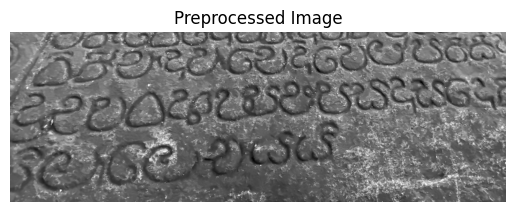

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, None, fx=0.5, fy=0.5)
    img = cv2.convertScaleAbs(img)
    img = cv2.fastNlMeansDenoising(img, None, h=10)
    img = img.astype(np.float32) / 255.0
    img = cv2.convertScaleAbs(img * 255.0)
    return img

# Replace "path/to/your/image.jpg" with the actual path to your stone scripture image
image_path = "IMG_5692.jpg"
preprocessed_img = preprocess_image(image_path)

# Display the preprocessed image
plt.imshow(preprocessed_img, cmap='gray')
plt.axis('off')
plt.title('Preprocessed Image')
plt.show()




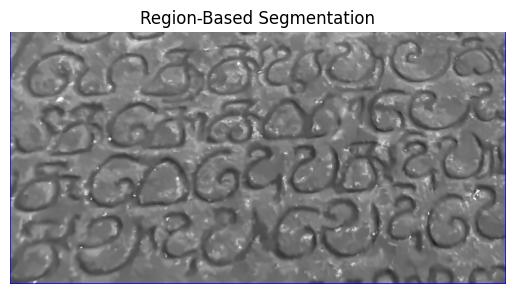

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for Watershed-based segmentation
def watershed_segmentation(img):
    # Convert the image to grayscale
    gray = img

    # Apply thresholding to obtain a binary image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform morphological operations to clean up the image
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Label markers for watershed algorithm
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply watershed algorithm
    img_copy = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.watershed(img_copy, markers)
    img_copy[markers == -1] = [0, 0, 255]  # Mark watershed boundaries in red

    return img_copy

# Apply Watershed-based segmentation to the preprocessed image
segmented_img_watershed = watershed_segmentation(preprocessed_img)

# Display the result of Watershed-based segmentation
plt.imshow(segmented_img_watershed)
plt.axis('off')
plt.title('Watershed-Based Segmentation')
plt.show()


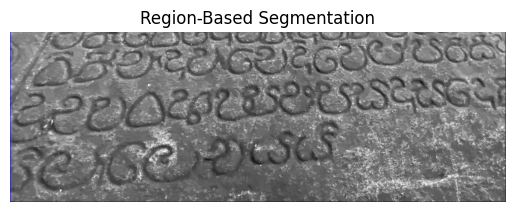

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for region-based segmentation using watershed algorithm
def region_based_segmentation(img):
    # Threshold the image to obtain a binary image
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform morphological operations to clean up the image
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Perform a distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

    # Normalize the distance transform to range 0-255
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Convert sure_fg to uint8 type
    sure_fg = np.uint8(sure_fg)

    # Find unknown region
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    sure_bg = 255 - sure_bg

    # Mark the unknown region in sure_bg
    sure_fg = cv2.subtract(sure_fg, sure_bg)

    # Label the markers for watershed algorithm
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[sure_bg == 255] = 0

    # Apply watershed algorithm
    img_copy = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.watershed(img_copy, markers)

    # Highlight the segmented regions on the original image
    img_copy[markers == -1] = [0, 0, 255]  # Mark watershed boundaries in red

    return img_copy

# Apply region-based segmentation to the preprocessed image
segmented_img_region = region_based_segmentation(preprocessed_img)

# Display the result of region-based segmentation
plt.imshow(segmented_img_region)
plt.axis('off')
plt.title('Region-Based Segmentation')
plt.show()



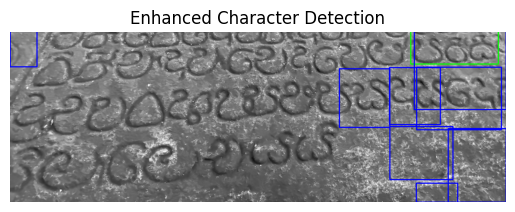

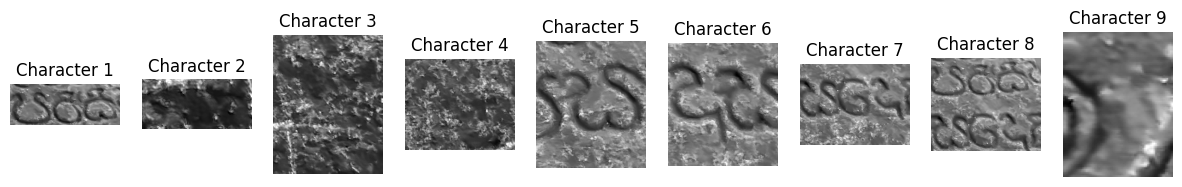